In [1]:
import os
from importlib import reload

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import regressor
import doe
import explain
import features
import response
import genetic

import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels

ModuleNotFoundError: No module named 'regressor'

In [94]:
plt.style.use("../../matplotlib.mplstyle")
mice = pd.read_csv("../../01_Imputation_MICE/imputed_data.mice.csv")

In [95]:
# Features to augment
xcols = ['lspk1', 'tspk1', 'lsfw1', 'tsfw1', 'lspk2', 'tspk2',
         'lsfw2', 'tsfw2', 'lspk3', 'tspk3', 'lsfw3', 'tsfw3']
ycols = ['square', 'full', 'lobe', 'half', 'agg', 'line']

bestfeats3 = ['tspk1', 'tsfw3', 'lsfw2', 'lspk1', 'tspk2', 'lspk2', 'dw11', 'tp31', 'dp32']
bestfeats2 = ['tspk1', 'lspk1', 'lsfw2', 'tw21', 'dw11', 'tspk2', 'tsfw2', 'lspk2', 'tsfw1']

In [96]:
# rows that were imputed
imp_rows = np.any(mice.isna(), axis=1)
imp_ids = mice.loc[imp_rows,]['trial']
impdf = mice[mice[".imp"] > 0]
impdf = impdf[impdf.trial.isin(imp_ids)]

# select the rows that were available
availdf = mice.loc[~imp_rows,]
availdf = availdf.loc[availdf[".imp"] == 0]

In [97]:
csv = pd.read_csv("AvgResponses.csv", index_col=0)

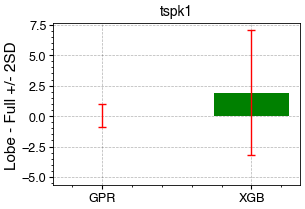

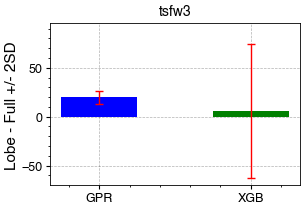

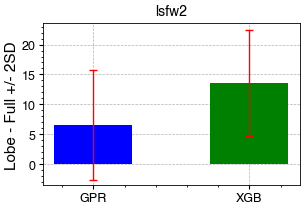

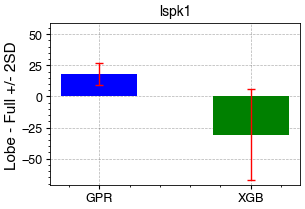

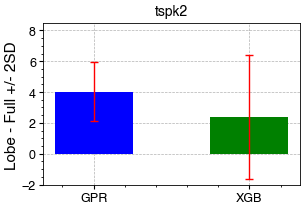

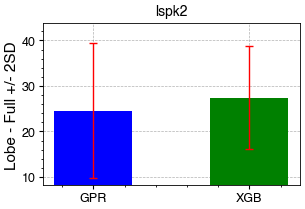

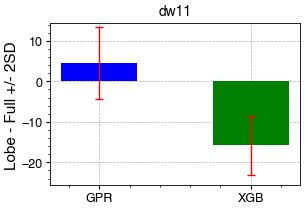

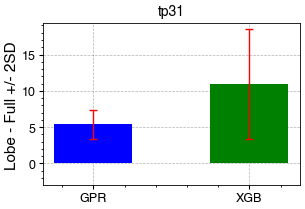

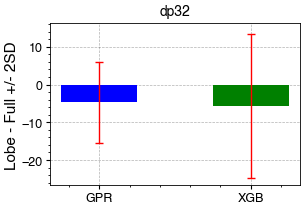

In [87]:
width = 0.50  # the width of the bars
cols = csv.columns.drop(['imp', 'alg', 'opt'])
algs = ['GPR', 'XGB']
colors = ['b', 'g']
x = np.arange(len(algs))

for i, col in enumerate(cols):
    fig, ax = plt.subplots(figsize = (3.25, 2.3))
    gprf = csv[(csv.alg == 'gpr') & (csv.opt == 'full')].set_index('imp')[col]
    gprl = csv[(csv.alg == 'gpr') & (csv.opt == 'lobe')].set_index('imp')[col]
    gprd = gprl - gprf

    xgbf = csv[(csv.alg == 'xgb') & (csv.opt == 'full')].set_index('imp')[col]
    xgbl = csv[(csv.alg == 'xgb') & (csv.opt == 'lobe')].set_index('imp')[col]
    xgbd = xgbl - xgbf

    means = np.array([gprd.mean(), xgbd.mean()])
    errs = np.array([gprd.std(), xgbd.std()])

    ax.bar(x, means, width, color=colors)
    ax.errorbar(x, means, yerr=2*errs, color='r', capsize=3, fmt="None")
    
    ax.set_xticks(x, algs)
    ax.set_ylabel("Lobe - Full +/- 2SD", fontsize=11)
    ax.set_title(col)
    ax.grid(True)
    ax.set_ylim(means.min() - 2.2 * errs.max(), means.max() + 2.2 * errs.max())

    fig.tight_layout()
    plt.show()


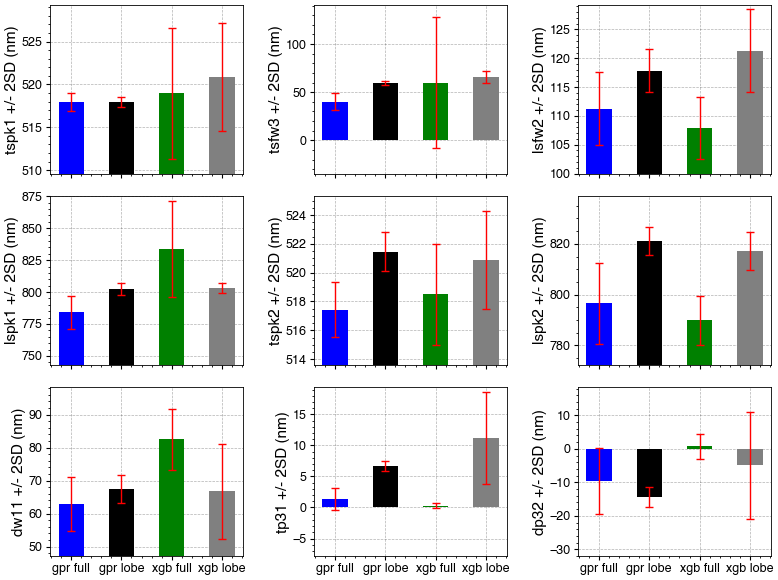

In [106]:
width = 0.50  # the width of the bars
cols = csv.columns.drop(['imp', 'alg', 'opt'])
algs = ['gpr full', 'gpr lobe', 'xgb full', 'xgb lobe']
colors = ['b', 'k', 'g', 'gray']
x = np.arange(len(algs))

fig, ax = plt.subplots(3, 3, figsize = (8, 6), sharex=True)

ax = ax.flatten()

for i, col in enumerate(cols):
    gprf = csv[(csv.alg == 'gpr') & (csv.opt == 'full')][col]
    gprl = csv[(csv.alg == 'gpr') & (csv.opt == 'lobe')][col]
    xgrf = csv[(csv.alg == 'xgb') & (csv.opt == 'full')][col]
    xgrl = csv[(csv.alg == 'xgb') & (csv.opt == 'lobe')][col]
    
    means = np.array([gprf.mean(), gprl.mean(), xgrf.mean(), xgrl.mean()])
    errs = np.array([gprf.std(), gprl.std(), xgrf.std(), xgrl.std()])

    ax[i].bar(x, means, width, color=colors)
    ax[i].errorbar(x, means, yerr=2*errs, color='r', capsize=3, fmt="None")
    
    ax[i].set_xticks(x, algs)
    ax[i].set_ylabel(col + " +/- 2SD (nm)", fontsize=11)
    ax[i].grid(True)
    ax[i].set_ylim(means.min() - 2.2 * errs.max(), means.max() + 2.2 * errs.max())

fig.tight_layout()

# plt.savefig("AvgResponses_augScale.png", dpi=300)
plt.savefig("AvgResponses_augScale.svg", dpi=300)
plt.show()

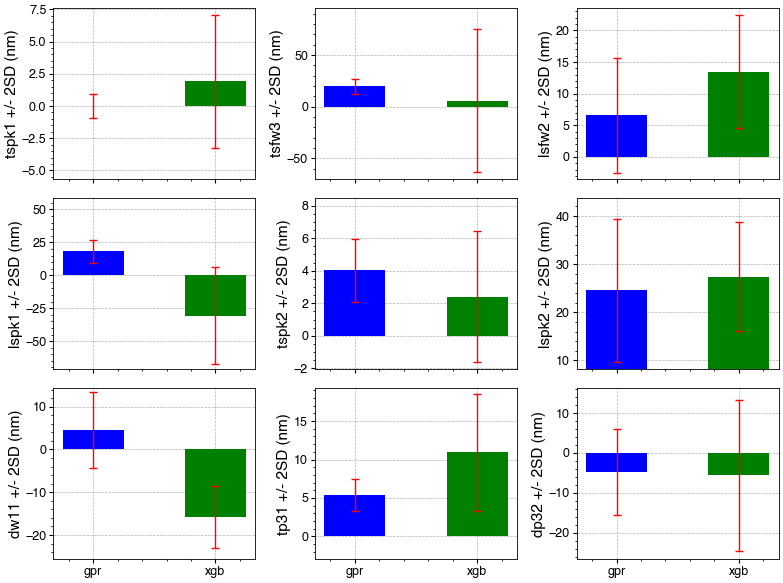

In [84]:
width = 0.50  # the width of the bars
cols = csv.columns.drop(['imp', 'alg', 'opt'])
algs = ['gpr', 'xgb']
colors = ['b', 'g']
x = np.arange(len(algs))

fig, ax = plt.subplots(3, 3, figsize = (8, 6), sharex=True)

ax = ax.flatten()

for i, col in enumerate(cols):
    gprf = csv[(csv.alg == 'gpr') & (csv.opt == 'full')].set_index('imp')[col]
    gprl = csv[(csv.alg == 'gpr') & (csv.opt == 'lobe')].set_index('imp')[col]
    gprd = gprl - gprf

    xgbf = csv[(csv.alg == 'xgb') & (csv.opt == 'full')].set_index('imp')[col]
    xgbl = csv[(csv.alg == 'xgb') & (csv.opt == 'lobe')].set_index('imp')[col]
    xgbd = xgbl - xgbf

    means = np.array([gprd.mean(), xgbd.mean()])
    errs = np.array([gprd.std(), xgbd.std()])

    ax[i].bar(x, means, width, color=colors)
    ax[i].errorbar(x, means, yerr=2*errs, color='r', capsize=3, fmt="None")
    
    ax[i].set_xticks(x, algs)
    ax[i].set_ylabel(col + " +/- 2SD (nm)", fontsize=11)
    ax[i].grid(True)
    ax[i].set_ylim(means.min() - 2.2 * errs.max(), means.max() + 2.2 * errs.max())

fig.tight_layout()

plt.savefig("AvgDifferences_augScale.png", dpi=300)
plt.show()

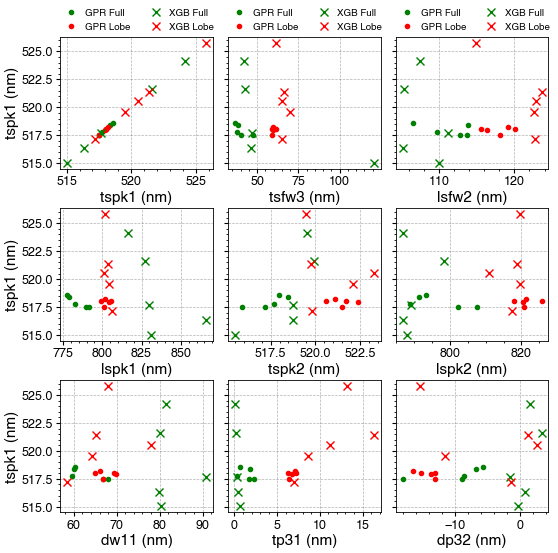

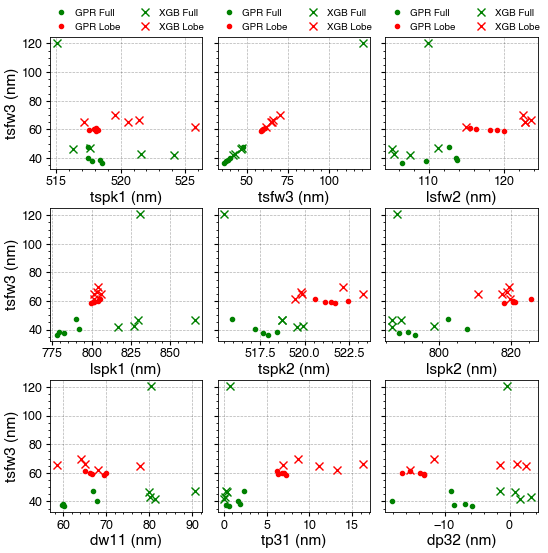

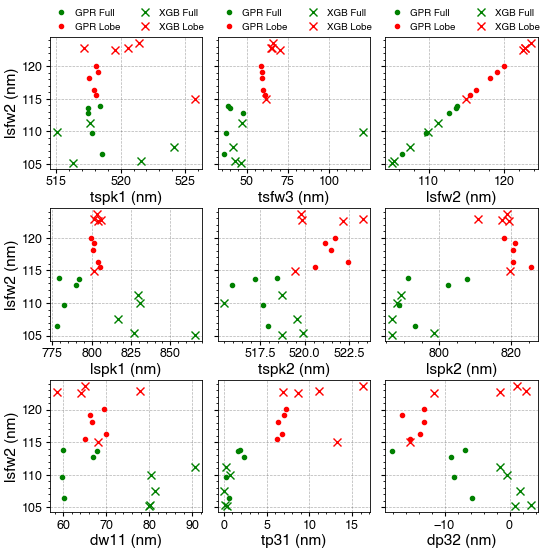

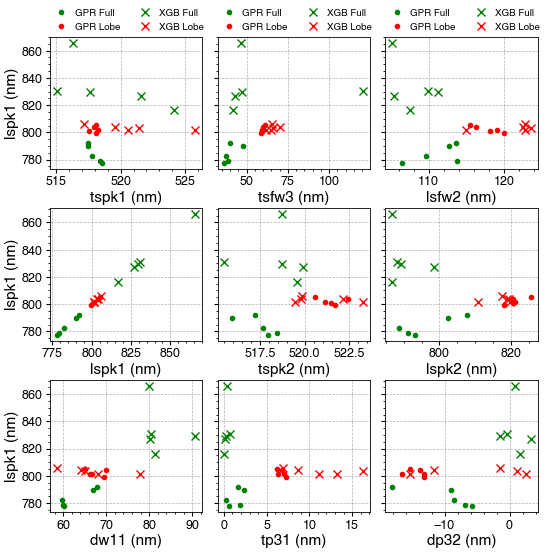

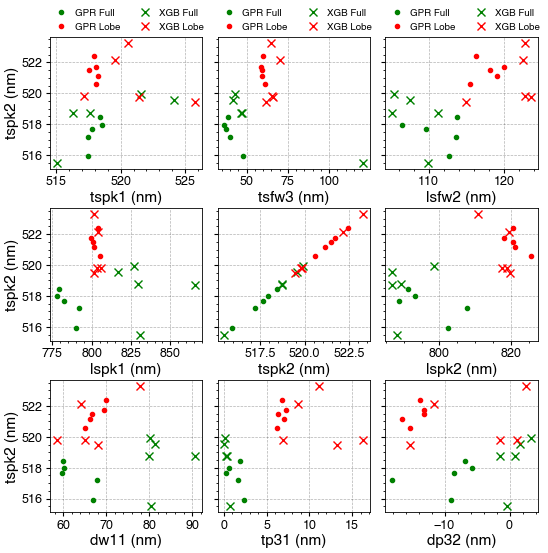

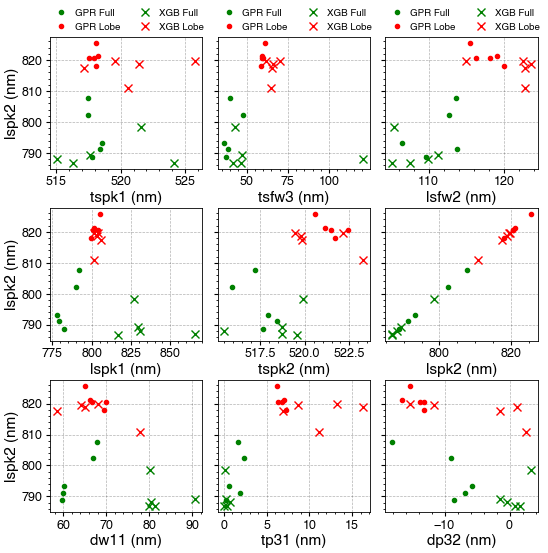

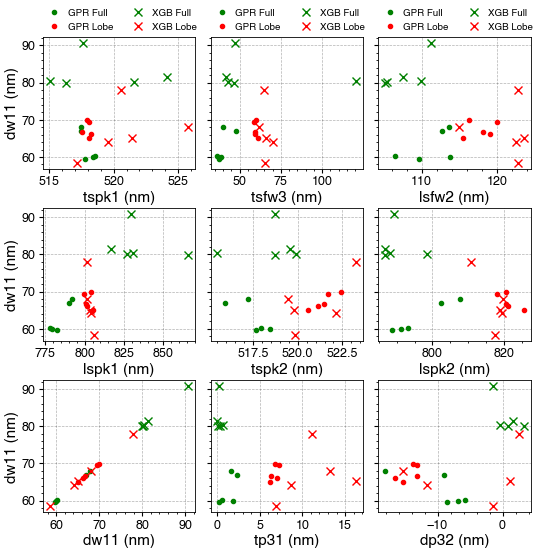

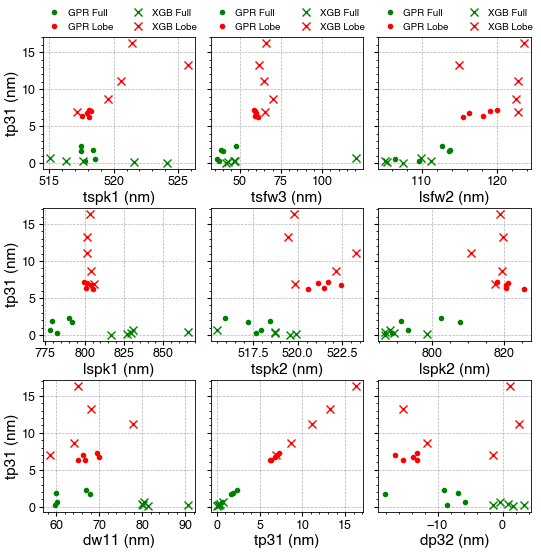

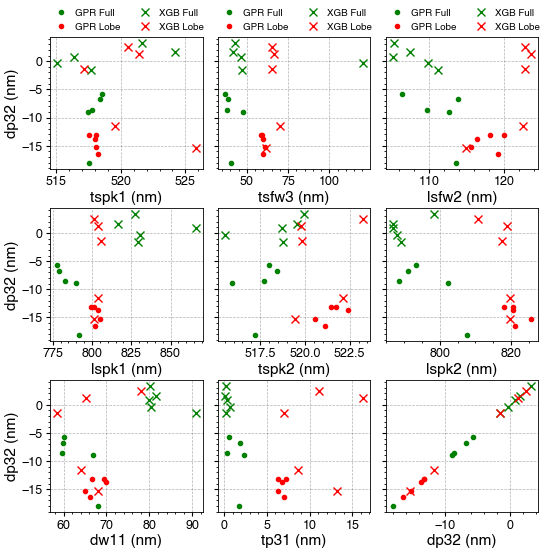

In [104]:
def add_plot(ax, x, y, color, marker, label):
    # sort values
    s = np.argsort(x)
    x = x[s]
    y = y[s]

    # poly fit
    trend = np.polyfit(x, y, 2)
    poly = np.poly1d(trend)
    corr = stats.spearmanr(x, y).correlation
    # ax.plot(x, poly(x), color+"--", alpha=0.6)
    ax.plot(x, y, color+marker, label = f"{label}")

width = 0.50  # the width of the bars
cols = csv.columns.drop(['imp', 'alg', 'opt'])
algs = ['GPR', 'XGB']
colors = ['b', 'g']
x = np.arange(len(algs))

for i, coly in enumerate(cols):
    fig, axes = plt.subplots(3, 3, figsize = (2.1*3, 2.1*3), sharey=True)
    axes = axes.flatten()
    
    gpryf = csv[(csv.alg == 'gpr') & (csv.opt == 'full')].set_index('imp')[coly].values
    gpryl = csv[(csv.alg == 'gpr') & (csv.opt == 'lobe')].set_index('imp')[coly].values
    xgbyf = csv[(csv.alg == 'xgb') & (csv.opt == 'full')].set_index('imp')[coly].values
    xgbyl = csv[(csv.alg == 'xgb') & (csv.opt == 'lobe')].set_index('imp')[coly].values

    for j, colx in enumerate(cols):
        gprxf = csv[(csv.alg == 'gpr') & (csv.opt == 'full')].set_index('imp')[colx].values
        gprxl = csv[(csv.alg == 'gpr') & (csv.opt == 'lobe')].set_index('imp')[colx].values
        xgbxf = csv[(csv.alg == 'xgb') & (csv.opt == 'full')].set_index('imp')[colx].values
        xgbxl = csv[(csv.alg == 'xgb') & (csv.opt == 'lobe')].set_index('imp')[colx].values

        ax = axes[j]

        add_plot(ax, gprxf, gpryf, "g", ".", "GPR Full")
        add_plot(ax, gprxl, gpryl, "r", ".", "GPR Lobe")
        add_plot(ax, xgbxf, xgbyf, "g", "x", "XGB Full")
        add_plot(ax, xgbxl, xgbyl, "r", "x", "XGB Lobe")

        ax.set_xlabel(colx + " (nm)", fontsize=11)
        if j % 3 == 0:
            ax.set_ylabel(coly + " (nm)", fontsize=11)
        if j < 3:
            ax.legend(loc=(0.01, 1.01), ncol=2, fontsize=7)
        ax.grid(True)

    # fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    # plt.savefig(f"CorrScatter_{coly}.png", dpi=300)
    plt.savefig(f"CorrScatter_{coly}.svg", dpi=300)
    plt.show()
